<a href="https://colab.research.google.com/github/DataTak/text_data_analysis/blob/main/notebooks/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 데이터출처: [깃허브](https://github.com/e9t/nsmc/)

In [2]:
import pandas as pd

In [3]:
#데이터가 있는 깃허브 레파지터리에서 불러옴. 구분자는 t로  설정
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt', sep='\t')


In [4]:
df.head(1)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0


# EDA
- shape
- 레이블 비율
- null
- label 분포
- 텍스트 길이
- 워드 클라우드

In [4]:
df.shape

(150000, 3)

In [5]:
df.label.value_counts()

,count
label,
0,75173
1,74827


In [6]:
#label의 그룹화 및 각 그룹의 비율
df.groupby('label').size() / len(df) *100

,0
label,
0,50.115333
1,49.884667


- 15만개의 영화 댓글 리뷰에 대한 데이터입니다.
- ID, 댓글, 레이블로 구성되어 있습니다.
- 레이블은 부정(0) / 긍정(1) 로 구성되어 있으면 각각의 비율은 약 50.1% / 49.9% 로 구성되어있습니다.

In [7]:
df.isna().sum()

,0
id,0
document,5
label,0


In [8]:
df[df.document.isna()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


- 5개의 id는 리뷰데이터가 없으며(결측), 부정3개, 긍정 2개로 구성되어 있습니다.

In [9]:
df.dropna(inplace=True)

전체 데이터 양에 비해 결측치가 차지하는 비중이 낮으므로 결측치를 삭제하고 데이터 분석을 진행하고자 합니다.

In [10]:
df.shape

(149995, 3)

결측치 처리 결과 149,995개의 인스턴스가 최종적으로 남아있음을 확인할 수 있습니다.

In [11]:
# 텍스트 길이
df['length'] = df.document.str.len()

In [12]:
df.length.describe()

,length
count,149995.000000
mean,35.204527
std,29.531890
min,1.000000
25%,16.000000
50%,27.000000
75%,42.000000
max,146.000000


<Axes: xlabel='length', ylabel='Count'>

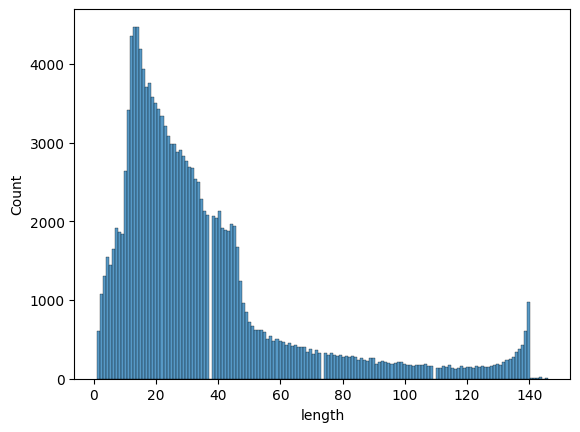

In [13]:
import seaborn as sns
sns.histplot(df.length)

- 리뷰 데이터 텍스트의 최대 길이는 146글자, 가장 짧은 단어는 1글자, 평균 35글자입니다.
- 일반적으로 사용자는 20~30글자 사이의 댓글을 가장 많이 다는 것을 알 수 있었다. 추후 신경망을 사용하여 학습하기 위해, 글자수를 특정 값 기준으로 잘라주어야 할 경우, 60글자 정도 수준에서 분할을 하여 처리를 할 예정이다.


## 워드클라우드

### 단계1: 라이브러리 및 워드클라우드 사용 한글 폰트 설치

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.4 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 단계2: 긍정, 부정 데이터프레임 생성

워드클라우드를 생성하기 위해 'document'컬럼에 담긴 데이털르 긍정과 부정으로 나누어서 별도의 변수(`positive_text`,` negative_text`)에 담아 두기 위한 과정


In [15]:
# nagative
negative_text = df[df.label == 0].document.str.cat(sep=' ')

# positive
positive_text = df[df.label == 1].document.str.cat(sep=' ')

### 단계3: 부정 / 긍정 리뷰 전체 문장에 대한 워드클라우드 생성

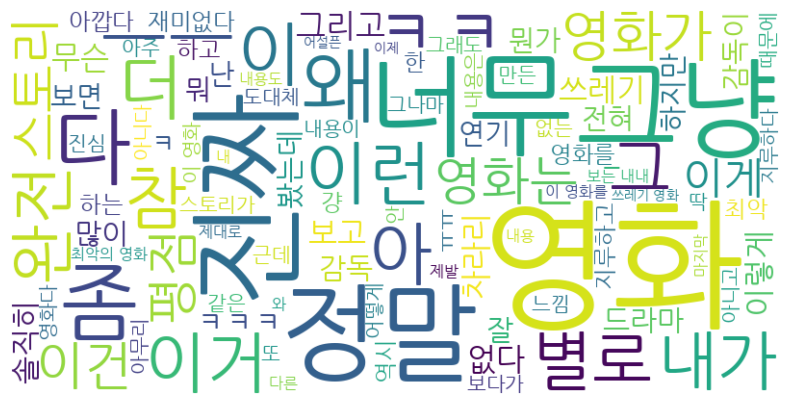

In [16]:

wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=400,
                      background_color='white',
                      max_words=100).generate(negative_text)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

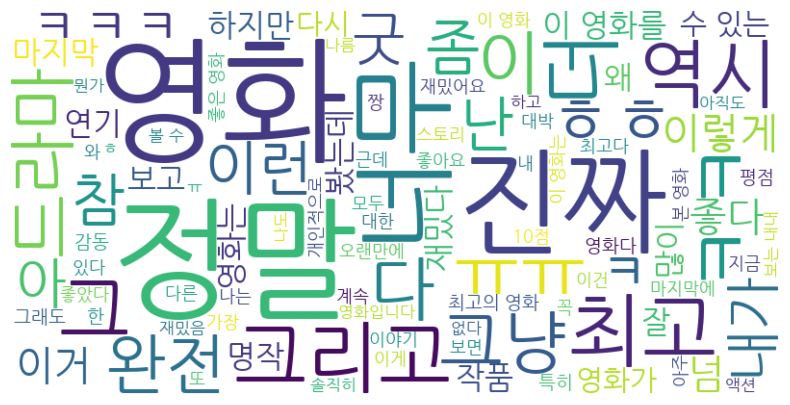

In [17]:


wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=400,
                      background_color='white',
                      max_words=100).generate(positive_text)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

전체 문장으로 보았을 때 필요없는 단어 등이 많이 포함되어 워드클라우드로 의미가 잘 확인되지 않아 명사 추출(토큰화) 하여 워드클라우드를 생성하기로 함.

### 단계4: 명사추출(토큰화) 및 워드클라우드 생성

In [18]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.5 MB/s eta 0:00:00


In [ ]:

from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석기 객체 생성
okt = Okt()


# 텍스트를 형태소 분석하여 명사만 추출
nouns_0 = okt.nouns(negative_text)

# 추출한 명사의 빈도수 계산
word_count_0 = Counter(nouns_0)

# 단어 빈도수 출력
print(word_count_0)


Counter({'영화': 24598, '점': 4573, '진짜': 4333, '이': 4132, '평점': 3639, '스토리': 3481, '왜': 3356, '쓰레기': 3346, '정말': 3259, '것': 3160, '뭐': 3130, '감독': 2826, '그냥': 2823, '연기': 2753, '내용': 2720, '시간': 2509, '거': 2443, '재미': 2407, '사람': 2404, '좀': 2404, '말': 2374, '배우': 2248, '최악': 2238, '내': 2161, '이건': 2141, '더': 2057, '드라마': 2039, '생각': 1982, '돈': 1955, '보고': 1895, '별로': 1892, '걸': 1610, '하나': 1584, '개': 1507, '그': 1505, '때': 1497, '주인공': 1445, '나': 1421, '정도': 1399, '처음': 1342, '끝': 1316, '연출': 1270, '볼': 1261, '액션': 1256, '임': 1244, '수준': 1200, '완전': 1147, '이해': 1137, '작품': 1135, '느낌': 1120, '여자': 1085, '듯': 1083, '장면': 1083, '안': 1080, '수': 1059, '때문': 1049, '무슨': 1027, '감동': 1020, '전개': 1008, '못': 998, '애': 989, '소재': 981, '이야기': 959, '결말': 925, '보기': 918, '편': 889, '마지막': 874, '원작': 834, '실망': 833, '이영화': 813, '노잼': 763, '전혀': 762, '게': 757, '점도': 757, '별': 743, '알바': 714, '급': 704, '차라리': 703, '줄': 700, '남자': 686, '작가': 685, '움': 684, '중': 684, '반전': 666, '뿐': 656, '코미디': 655, '보지': 65

In [ ]:
word_count_0.most_common(10)

[('영화', 24598),
 ('점', 4573),
 ('진짜', 4333),
 ('이', 4132),
 ('평점', 3639),
 ('스토리', 3481),
 ('왜', 3356),
 ('쓰레기', 3346),
 ('정말', 3259),
 ('것', 3160)]

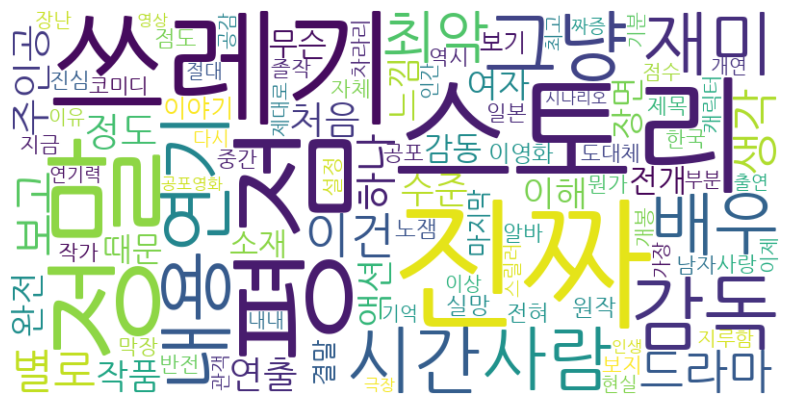

In [ ]:
# 불용어 리스트 정의
stopwords = ['영화']

# 불용어 제거 및 단어 길이 필터링 (2글자 이상만 남기기)
filtered_nouns = [noun for noun in nouns_0 if noun not in stopwords and len(noun) > 1]

# 단어 빈도수 계산
word_count_0 = Counter(filtered_nouns)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 나눔 고딕 폰트 사용
    background_color='white',
    width=800, height=400, max_words=100
).generate_from_frequencies(word_count_0)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
# Okt 형태소 분석기 객체 생성
okt = Okt()


# 텍스트를 형태소 분석하여 명사만 추출
nouns = okt.nouns(positive_text)

# 추출한 명사의 빈도수 계산
word_count = Counter(nouns)

# 단어 빈도수 출력
print(word_count)


Counter({'영화': 26139, '정말': 6386, '최고': 5569, '진짜': 4010, '이': 3869, '감동': 3859, '연기': 3681, '점': 3357, '생각': 3332, '것': 3155, '드라마': 3024, '때': 2817, '보고': 2717, '평점': 2685, '사람': 2432, '다시': 2360, '사랑': 2335, '더': 2309, '수': 2194, '그': 2193, '말': 2191, '내': 2145, '배우': 2049, '마지막': 1881, '스토리': 1863, '작품': 1829, '왜': 1801, '명작': 1780, '거': 1696, '나': 1639, '지금': 1577, '볼': 1529, '재미': 1523, '완전': 1395, '역시': 1382, '꼭': 1369, '장면': 1353, '감독': 1300, '마음': 1289, '하나': 1254, '좀': 1251, '이야기': 1215, '또': 1201, '내용': 1179, '가슴': 1169, '액션': 1141, '정도': 1124, '처음': 1110, '인생': 1106, '기억': 1100, '난': 1056, '그냥': 1015, '이영화': 1011, '매력': 999, '눈물': 987, '한번': 976, '느낌': 975, '여운': 969, '음악': 962, '중': 958, '듯': 953, '굿': 951, '현실': 944, '주인공': 937, '시간': 937, '가장': 923, '추천': 894, '우리': 891, '임': 886, '대박': 875, '아이': 851, '연출': 812, '번': 806, '만': 795, '저': 772, '이해': 769, '인간': 750, '짱': 742, '속': 735, '알': 735, '끝': 731, '모습': 731, '편': 731, '안': 724, '걸': 718, '반전': 716, '한국': 700, '모두':

In [ ]:
word_count.most_common(10)

[('영화', 26139),
 ('정말', 6386),
 ('최고', 5569),
 ('진짜', 4010),
 ('이', 3869),
 ('감동', 3859),
 ('연기', 3681),
 ('점', 3357),
 ('생각', 3332),
 ('것', 3155)]

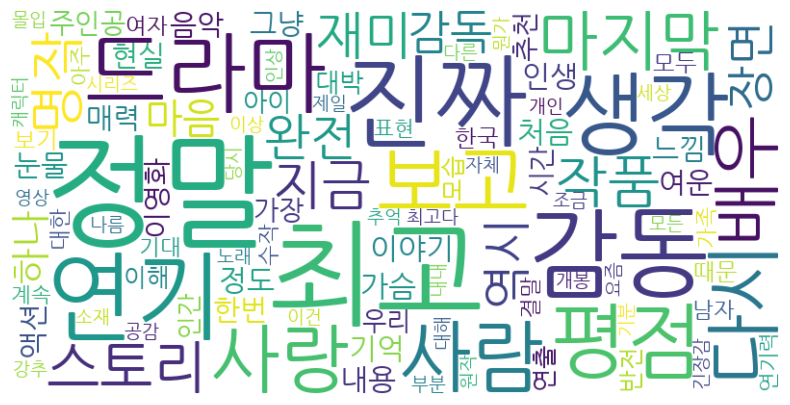

In [ ]:
# 불용어 리스트 정의 (원하는 대로 추가/삭제 가능)
stopwords = ['영화']

# 불용어 제거 및 단어 길이 필터링 (2글자 이상만 남기기)
filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# 단어 빈도수 계산
word_count = Counter(filtered_nouns)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 나눔 고딕 폰트 사용
    background_color='white',
    width=800, height=400, max_words=100
).generate_from_frequencies(word_count)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# 데이터 전처리
- 텍스트 데이터를 신경망에 입력하기 위힌 전처리

리뷰-> 토큰화(konlpy 활용.. 명사만? 등 기준 잡기)-> 불용어를 제거할 수 있으면 제거해주기 (영화, 정말, 진짜.. 등) -> 할수 있으면 빈도수를 바탕으로 레이블 만들기 -> 토큰들에 대해서 숫자로 맵핑(Tf-idf 벡터라이저나, bow) -> padsequence -> 모델에 넣기

## 단계1. 토큰화

In [5]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 25.9 MB/s eta 0:00:00


In [6]:
#documnet 컬럼의 문자를 str로 변경
df['document'] = df['document'].astype(str)

In [7]:
from konlpy.tag import Okt
from collections import Counter


# Okt 형태소 분석기 객체 생성
okt = Okt()

# 리뷰 데이터를 토큰화하는 함수
def tokenize(text):
    return okt.morphs(text)

# 'document' 컬럼에 들어 있는 리뷰 데이터를 토큰화
df['tokenized_review'] = df['document'].apply(tokenize)

'''
#람다로 만들어보기
df['tokenized_review'] = df['document'].apply(lambda x: okt.morphs(x))
'''

"\n#람다로 만들어보기\ndf['tokenized_review'] = df['document'].apply(lambda x: okt.morphs(x))\n"

In [8]:
df.head(10)

,id,document,label,tokenized_review
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, .., 진짜, 짜증나네요, 목소리]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, ..., 포스터, 보고, 초딩, 영화, 줄, ...., 오버, 연기, 조차,..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, .., 솔직히, 재미, 는, 없다, .., 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, !, 스파이더맨..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,"[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,"[원작, 의, 긴장감, 을, 제대로, 살려내지못, 했다, .]"
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,"[별, 반개, 도, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 이,..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,"[액션, 이, 없는데도, 재미, 있는, 몇, 안되는, 영화]"
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,"[왜케, 평점, 이, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, ..."


## 단계2. 불용어 제거(옵션)


In [9]:
# 불용어 리스트 생성
stopwords = ['영화', '이', '가', '의', '에', '은', '는', '을', '를', '도', '로', '에서', '에게', '그리고']

# 불용어를 제거하는 함수 정의
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

# 'tokenized' 컬럼에 있는 토큰화된 리뷰에서 불용어 제거
df['filtered'] = df['tokenized_review'].apply(remove_stopwords)


In [10]:
df.head(10)

,id,document,label,tokenized_review,filtered
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, ..., 포스터, 보고, 초딩, 영화, 줄, ...., 오버, 연기, 조차,...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, .., 솔직히, 재미, 는, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, !, 스파이더맨...","[사이, 몬페, 그, 익살스런, 연기, 돋보였던, !, 스파이더맨, 늙어, 보이기만..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,"[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,"[원작, 의, 긴장감, 을, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 살려내지못, 했다, .]"
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,"[별, 반개, 도, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 이,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 몇, 년,..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,"[액션, 이, 없는데도, 재미, 있는, 몇, 안되는, 영화]","[액션, 없는데도, 재미, 있는, 몇, 안되는]"
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,"[왜케, 평점, 이, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, ...","[왜케, 평점, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, ..."


## 단계3. 특정 빈도수 이상 등장한 토큰만 남기기(옵션)

In [11]:
from collections import Counter

# 1. 모든 리뷰에서 토큰화된 단어들의 빈도 계산
all_tokens = [token for tokens in df['filtered'] for token in tokens]  # 'filtered' 컬럼에서 모든 토큰을 모음
token_counts = Counter(all_tokens)  # 각 토큰의 빈도 계산

# 2. 특정 빈도수 이상 등장한 토큰만 남기기
min_freq = 5  # 기준 빈도수 설정
frequent_tokens = {token for token, count in token_counts.items() if count >= min_freq}  # 빈도수 기준을 만족하는 토큰들

# 3. 리뷰에서 특정 빈도수 이상 등장한 토큰만 남기는 함수 정의
def filter_by_frequency(tokens):
    return [token for token in tokens if token in frequent_tokens]

# 'filtered' 컬럼에 있는 리뷰에서 빈도 기준을 적용
df['final_tokens'] = df['filtered'].apply(filter_by_frequency)


In [12]:
df.head(10)

,id,document,label,tokenized_review,filtered,final_tokens
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, ..., 포스터, 보고, 초딩, 영화, 줄, ...., 오버, 연기, 조차,...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 다그, 래서, 보는것을, 추천, 한, 다]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, .., 솔직히, 재미, 는, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, !, 스파이더맨...","[사이, 몬페, 그, 익살스런, 연기, 돋보였던, !, 스파이더맨, 늙어, 보이기만...","[사이, 그, 연기, 돋보였던, !, 스파이더맨, 늙어, 했던, 너무나도, 이뻐, ..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,"[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, ., ㅋㅋ..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,"[원작, 의, 긴장감, 을, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 했다, .]"
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,"[별, 반개, 도, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 이,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 몇, 년,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 연, 기, 생활, 몇, 년, 인지, ..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,"[액션, 이, 없는데도, 재미, 있는, 몇, 안되는, 영화]","[액션, 없는데도, 재미, 있는, 몇, 안되는]","[액션, 없는데도, 재미, 있는, 몇, 안되는]"
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,"[왜케, 평점, 이, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, ...","[왜케, 평점, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, ...","[왜케, 평점, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, 너무, 있나..."


## 단계4. 토큰을 벡터(숫자)로 변환

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

#토크나이저로 단어 집합을 생성하고, 빈도수 기준 상위 20,000개의 단어만 사용
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df['final_tokens'])

df['tokenized_numbers'] = tokenizer.texts_to_sequences(df['final_tokens'])

'''
# 1. 토큰화된 리뷰를 정수로 인코딩하기 위해 Tokenizer 사용
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['final_tokens_str'])  # 'final_tokens_str' 컬럼을 기준으로 학습

# 2. 각 리뷰를 정수 시퀀스로 변환
df['tokenized_numbers'] = tokenizer.texts_to_sequences(df['final_tokens_str'])
'''

"\n# 1. 토큰화된 리뷰를 정수로 인코딩하기 위해 Tokenizer 사용\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(df['final_tokens_str'])  # 'final_tokens_str' 컬럼을 기준으로 학습\n\n# 2. 각 리뷰를 정수 시퀀스로 변환\ndf['tokenized_numbers'] = tokenizer.texts_to_sequences(df['final_tokens_str'])\n"

In [14]:
df.head(10)

,id,document,label,tokenized_review,filtered,final_tokens,tokenized_numbers
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[47, 457, 2, 14, 7140, 674]"
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, ..., 포스터, 보고, 초딩, 영화, 줄, ...., 오버, 연기, 조차,...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지]","[927, 3, 458, 43, 621, 203, 34, 1612, 17, 1004..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 다그, 래서, 보는것을, 추천, 한, 다]","[381, 2953, 6690, 8629, 12492, 207, 8, 9]"
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, .., 솔직히, 재미, 는, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]","[8984, 107, 11687, 2, 223, 57, 76, 2, 19, 4548]"
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, !, 스파이더맨...","[사이, 몬페, 그, 익살스런, 연기, 돋보였던, !, 스파이더맨, 늙어, 보이기만...","[사이, 그, 연기, 돋보였던, !, 스파이더맨, 늙어, 했던, 너무나도, 이뻐, ...","[1096, 25, 17, 6691, 13, 3157, 5522, 483, 1149..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,"[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, ., ㅋㅋ...","[757, 7652, 1012, 103, 409, 141, 1937, 41, 183..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,"[원작, 의, 긴장감, 을, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 했다, .]","[201, 314, 322, 229, 1]"
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,"[별, 반개, 도, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 이,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 몇, 년,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 연, 기, 생활, 몇, 년, 인지, ...","[121, 1120, 144, 331, 750, 14550, 338, 123, 17..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,"[액션, 이, 없는데도, 재미, 있는, 몇, 안되는, 영화]","[액션, 없는데도, 재미, 있는, 몇, 안되는]","[액션, 없는데도, 재미, 있는, 몇, 안되는]","[94, 19878, 57, 89, 371, 417]"
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,"[왜케, 평점, 이, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, ...","[왜케, 평점, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, ...","[왜케, 평점, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, 너무, 있나...","[1736, 19, 7, 536, 79, 12, 8, 400, 2, 1603, 36..."


## 단계5. 글자 수 맞추기(pad_sequence)

In [15]:
df['length'] = df['tokenized_numbers'].apply(lambda x: len(df['tokenized_numbers'][x]))

<Axes: xlabel='length', ylabel='Count'>

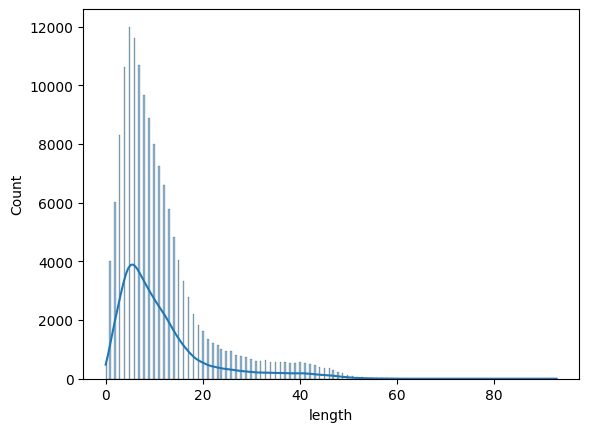

In [16]:
import seaborn as sns

sns.histplot(df['length'], kde = True)

In [17]:
df.length.describe()

,length
count,150000.000000
mean,11.438533
std,9.562420
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,93.000000


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. 패딩을 적용할 최대 길이 설정 (필요에 따라 조정 가능)
max_len = 14  # 리뷰의 최대 길이 설정 (75%로 정했음.)

# 2. 'tokenized_numbers' 컬럼에 있는 정수 시퀀스를 패딩 적용
df['padded'] = pad_sequences(df['tokenized_numbers'], maxlen=max_len, padding='post').tolist()


In [19]:
df.head(10)

,id,document,label,tokenized_review,filtered,final_tokens,tokenized_numbers,length,padded
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[아, 더빙, .., 진짜, 짜증나네요, 목소리]","[47, 457, 2, 14, 7140, 674]",6,"[47, 457, 2, 14, 7140, 674, 0, 0, 0, 0, 0, 0, ..."
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠, ..., 포스터, 보고, 초딩, 영화, 줄, ...., 오버, 연기, 조차,...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지...","[흠, ..., 포스터, 보고, 초딩, 줄, ...., 오버, 연기, 조차, 가볍지]","[927, 3, 458, 43, 621, 203, 34, 1612, 17, 1004...",11,"[927, 3, 458, 43, 621, 203, 34, 1612, 17, 1004..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[너, 무재, 다그, 래서, 보는것을, 추천, 한, 다]","[381, 2953, 6690, 8629, 12492, 207, 8, 9]",8,"[381, 2953, 6690, 8629, 12492, 207, 8, 9, 0, 0..."
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, .., 솔직히, 재미, 는, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]","[교도소, 이야기, 구먼, .., 솔직히, 재미, 없다, .., 평점, 조정]","[8984, 107, 11687, 2, 223, 57, 76, 2, 19, 4548]",10,"[8984, 107, 11687, 2, 223, 57, 76, 2, 19, 4548..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, !, 스파이더맨...","[사이, 몬페, 그, 익살스런, 연기, 돋보였던, !, 스파이더맨, 늙어, 보이기만...","[사이, 그, 연기, 돋보였던, !, 스파이더맨, 늙어, 했던, 너무나도, 이뻐, ...","[1096, 25, 17, 6691, 13, 3157, 5522, 483, 1149...",11,"[1096, 25, 17, 6691, 13, 3157, 5522, 483, 1149..."
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0,"[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 뗀, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, 살용...","[막, 걸음, 마, 3, 세, 부터, 초등학교, 1, 학년, 생인, 8, ., ㅋㅋ...","[757, 7652, 1012, 103, 409, 141, 1937, 41, 183...",19,"[141, 1937, 41, 1835, 19877, 490, 1, 91, 3, 12..."
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0,"[원작, 의, 긴장감, 을, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 살려내지못, 했다, .]","[원작, 긴장감, 제대로, 했다, .]","[201, 314, 322, 229, 1]",5,"[201, 314, 322, 229, 1, 0, 0, 0, 0, 0, 0, 0, 0..."
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0,"[별, 반개, 도, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 이,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 길용우, 연, 기, 생활, 몇, 년,...","[별, 반개, 아깝다, 욕, 나온다, 이응경, 연, 기, 생활, 몇, 년, 인지, ...","[121, 1120, 144, 331, 750, 14550, 338, 123, 17...",36,"[1545, 1545, 2, 36, 268, 76, 17, 33, 42, 40, 1..."
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,"[액션, 이, 없는데도, 재미, 있는, 몇, 안되는, 영화]","[액션, 없는데도, 재미, 있는, 몇, 안되는]","[액션, 없는데도, 재미, 있는, 몇, 안되는]","[94, 19878, 57, 89, 371, 417]",6,"[94, 19878, 57, 89, 371, 417, 0, 0, 0, 0, 0, 0..."
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1,"[왜케, 평점, 이, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, ...","[왜케, 평점, 낮은건데, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, ...","[왜케, 평점, ?, 꽤, 볼, 만, 한, 데, .., 헐리우드, 식, 너무, 있나...","[1736, 19, 7, 536, 79, 12, 8, 400, 2, 1603, 36...",14,"[1736, 19, 7, 536, 79, 12, 8, 400, 2, 1603, 36..."


## 단계6. 학습용/테스트용 데이터 분할

In [20]:
import numpy as np
y = df['label'].values
X = np.array(df['padded'].tolist())


In [21]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
#분류모델은 stratify=y 설정해주기

In [22]:

X_train.shape, X_test.shape

((120000, 14), (30000, 14))

# 학습 모델 생성
 - LSTM 신경망을 사용하여 긍정, 부정 이진 분류를 판단할 수 있는 분류기 생성


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 단어 집합의 크기 (토크나이저로 생성된 고유 단어의 개수)
num_words = 20000  # 예를 들어, 상위 20,000개의 단어만 사용

# 모델 생성
model = Sequential()

# 1. 입력 데이터를 128 차원 벡터로 임베딩
model.add(Embedding(input_dim=num_words, output_dim=128))

# 2. 양방향 LSTM을 사용한 시퀀스 처리
model.add(Bidirectional(LSTM(256, return_sequences=True)))  # 첫 번째 LSTM 레이어
model.add(Bidirectional(LSTM(128)))  # 두 번째 LSTM 레이어

# 3. 출력층 - 이진 분류를 위해 sigmoid 활성화 함수 사용
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습 결과를 저장하기 위한 환경 설정정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.2f}.keras"

# 학습 중 모니터링 할 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

# 학습의 이른 종료를 위한 조건 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [25]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7600 - loss: 0.4738
Epoch 1: val_loss improved from inf to 0.36206, saving model to ./model/01-0.36.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.7603 - loss: 0.4734 - val_accuracy: 0.8410 - val_loss: 0.3621
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8760 - loss: 0.2941
Epoch 2: val_loss improved from 0.36206 to 0.35996, saving model to ./model/02-0.36.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8760 - loss: 0.2941 - val_accuracy: 0.8423 - val_loss: 0.3600
Epoch 3/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9053 - loss: 0.2340
Epoch 3: val_loss did not improve from 0.35996
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9053 - loss: 0.2341 - val_accuracy: 0.8390 - val_loss: 0.3830
Epoch 4/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9256 - loss: 0.1844
Epoch 4: val_loss did not improve from 0.35996
375/375 ━━━━━━━━━━━━━━━━━

# 평가
- 정확도(accuracy) 기반 평가


<Axes: >

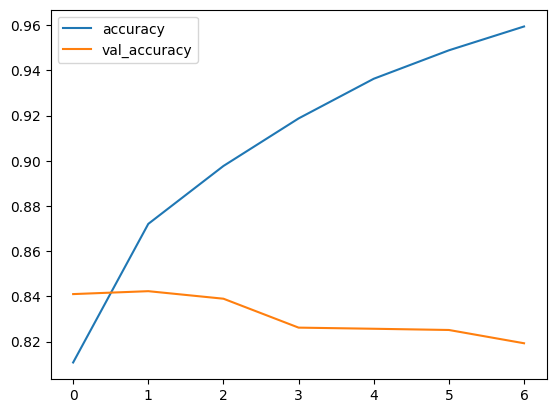

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [27]:
model.evaluate(X_test, y_test)

938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8176 - loss: 0.6835


[0.6826329827308655, 0.8185333609580994]

# 예측
- "이 영화 정말 재미있어요!"
- "돈 내고 보기 아까움.."
---
1. 토큰화: okt.morphs()
2. 불용어처리: remove_stopwords() <br>
⚠ 주의
- tokenizer 객체를 새로 생성하지 않는다.
- tokenizer에서 fit 작업을 새로 하지 않는다.
- 즉, 이전에 생성한 tokenizer를 재활용해야만 한다.
3. 글자 수 맞추기: pad_sequences


In [44]:
setences = "진짜 노잼. 이런걸 돈 주고 보다니 "

toknized_setence = okt.morphs(setences)

toknized_setence = remove_stopwords([toknized_setence])

#토큰을 벡터로 변환
X = tokenizer.texts_to_sequences(toknized_setence)

#패딩
padded_X = pad_sequences(X, maxlen=max_len, padding='post')
padded_X

array([[  14,  334,    1,   30,   97,  106,  396, 2543,    0,    0,    0,
           0,    0,    0]], dtype=int32)

In [45]:
if model.predict(padded_X) > 0.5:
    print("긍정")
else:
    print("부정")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
부정
